In [273]:
import numpy as np
import pandas as pd
dengue= pd.read_csv('denguebystation - Sheet1.csv', 
                  names = [ "Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug","Sep", "Oct", "Nov", "Dec", "Tot"])
weather= pd.read_csv('1724265.csv')


In [485]:
dengue.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tot
Colombo,584,606,294,224,296,700,1530,881,312,267,97,146,5937
Gampaha,608,623,306,205,295,381,686,417,174,101,77,87,3960
Kalutara,121,124,119,114,185,294,420,215,122,56,23,19,1812
Kandy,211,174,116,89,114,176,341,230,91,64,22,16,1644
Matale,138,113,35,46,35,35,97,43,23,21,19,45,650


In [486]:

#w1=weather.drop(['NUWARA ELIYA, CE'])
w1=weather[weather.NAME != 'NUWARA ELIYA, CE']
#weather.head(1000)
w1.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
0,CEM00043466,"COLOMBO, CE",6.9,79.867,7.0,2010-01,NaN,NaN,5,2,...,NaN,NaN,0.59,NaN,NaN,NaN,0.80,NaN,NaN,NaN
1,CEM00043466,"COLOMBO, CE",6.9,79.867,7.0,2010-02,NaN,NaN,4,1,...,13.0,NaN,0.11,95.0,NaN,NaN,0.21,NaN,90.5,NaN
2,CEM00043466,"COLOMBO, CE",6.9,79.867,7.0,2010-03,NaN,NaN,7,4,...,19.0,NaN,0.70,94.0,NaN,NaN,1.20,NaN,90.4,NaN
3,CEM00043466,"COLOMBO, CE",6.9,79.867,7.0,2010-04,NaN,NaN,20,13,...,16.0,NaN,4.61,91.0,NaN,NaN,17.37,NaN,89.9,NaN
4,CEM00043466,"COLOMBO, CE",6.9,79.867,7.0,2010-05,NaN,NaN,23,16,...,9.0,NaN,5.31,92.0,NaN,NaN,31.00,NaN,88.6,NaN


In [487]:
#w2=w1['NAME'].replace(['COLOMBO, CE'], 'Colombo')
mapping = {'COLOMBO, CE': 'Colombo', 'KURUNEGALA, CE': 'Kurunegala', 'CHINA BAY, CE': 'Trincomalee', 'PUTTALAM, CE': 'Puttalam'}
w2=w1.replace({'NAME': mapping})
w2.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
514,CEM00043424,Puttalam,8.033,79.833,2.0,2018-07,NaN,514.0,2,0,...,2.0,77.0,0.03,91.0,0.0,0.0,0.04,83.4,87.6,79.1
515,CEM00043424,Puttalam,8.033,79.833,2.0,2018-08,NaN,NaN,0,0,...,NaN,76.0,0.00,NaN,NaN,NaN,0.00,NaN,NaN,77.9
516,CEM00043424,Puttalam,8.033,79.833,2.0,2018-09,NaN,NaN,0,0,...,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
517,CEM00043424,Puttalam,8.033,79.833,2.0,2019-01,NaN,NaN,0,0,...,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
518,CEM00043424,Puttalam,8.033,79.833,2.0,2019-02,NaN,NaN,6,5,...,NaN,NaN,1.50,NaN,NaN,NaN,4.85,NaN,NaN,NaN


In [239]:
#df1=(dengue.loc[dengue['city'].isin(['Colombo','Trincomalee', 'Kurunegala', 'Puttalam'])]).drop(['Tot'], axis=1)

df1=dengue.loc[['Colombo', 'Trincomalee','Kurunegala', 'Puttalam']].drop(['Tot'], axis=1)




In [499]:
#df1.drop(df1.index[0], inplace=True)
#df1.head(30)

In [243]:
df2=df1.T

In [498]:
#df2.head(15)

In [488]:

#df3=df2.iloc[0:9,:]
#df4=df2.iloc[9:17,:]
#df5=df2.groupby(df2.columns.values, axis=1).agg(lambda x: x.values.tolist())
#df5=df2.pivot(columns='Colombo')
#df5=df2.stack()
df5=pd.melt(df2, id_vars = [], value_vars=['Colombo', 'Trincomalee', 'Kurunegala', 'Puttalam'])
#dff5=df5.rename(index=str, columns={"variable": "NAME"})
#df5= df3.T.append(df4.T)
#df5=df3.append(df4)
#df5=pd.concat([df3,df4])
#frames=[df3,df4]
#result = frames.concat()
#df.head()
#df = pd.DataFrame([[1, 2], [3, 4]])
#df.head()
#dff5.head(130)

In [489]:

days=pd.date_range('2010-01-01', '2019-12-31', freq='M', ).strftime('%Y-%m')
#days=pd.concat(pd.df5({'Start': pd.date_range('2010-01-01','2019-03-31', freq='M').strftime('%Y-%m'),variable,value}) 
#df_0 = pd.DataFrame(dict(year = i.year, month = i.month))
#df5['date'] = pandas.to_datetime(df5['date'], unit='s')
#df_0 = df_0.astype(str)
#pd.to_datetime(df.year + df.month, format="%Y%m")
#print(days)
dff = pd.DataFrame({'DATE': days})
#print(dff)

In [490]:
#newdf = pd.DataFrame(np.repeat(dff.values,4,axis=0))
#newdf = pd.DataFrame(np.tile(dff.values,4,axis=0))

newdf = pd.DataFrame(pd.np.tile(dff.values, (4, 1)))
newdf.columns = dff.columns
#print(newdf)

df4.head()

In [491]:
#df6=df5.['Colombo',:]
df6 = df5[df5.value != 0]
#df6 = df5[(df5 != 0)]
#df6=df5[paste0('Colombo',:]
#df6['Colombo'].apply(len)
#print(df6)

In [492]:
df7=pd.concat([newdf,df6],axis=1)
#df7.tail(130)

In [493]:
dff7=df7.rename(index=str, columns={"variable": "NAME"})
#dff7.head(140)

In [494]:
#merge w2 and df7
#result = pd.concat([w2, df7], axis=1, join_axes=[w2.index])
#s1 = pd.merge(w2, df7, how='inner', on=['NAME'])

s1 = pd.merge(w2, dff7, how='left', on=['DATE', 'NAME'])
#s1.tail(50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e636630>,
      dtype=object)

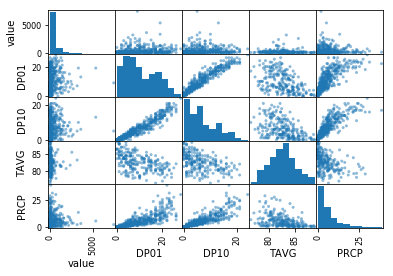

In [412]:
#data Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes=["value","DP01","DP10","TAVG","PRCP"]
scatter_matrix(s1[attributes])

In [500]:
attributes1=["value","EMXP","EMXT","DX90"]
#scatter_matrix(s1[attributes1])

In [416]:
s1.max()

STATION      CEM00043466
NAME         Trincomalee
LATITUDE           8.539
LONGITUDE         81.182
ELEVATION            116
DATE             2019-02
CDSD                5900
CLDD                 666
DP01                  28
DP10                  24
DT00                   0
DT32                   0
DX32                   0
DX70                  31
DX90                  31
EMNT                  79
EMXP               17.44
EMXT                 103
HDSD                   0
HTDD                   0
PRCP               38.22
TAVG                88.7
TMAX                98.7
TMIN                81.6
value               7471
dtype: object

In [418]:
corr_matrix= s1.corr()

In [419]:
corr_matrix['value'].sort_values(ascending=False)

value        1.000000
DP01         0.104320
DP10         0.066623
TMIN         0.065013
CDSD         0.036987
EMNT        -0.002603
PRCP        -0.008001
EMXP        -0.028354
TAVG        -0.036649
CLDD        -0.053089
DX70        -0.055889
ELEVATION   -0.117214
TMAX        -0.189298
EMXT        -0.262352
DX90        -0.275675
LONGITUDE   -0.328226
LATITUDE    -0.534717
DT00              NaN
DT32              NaN
DX32              NaN
HDSD              NaN
HTDD              NaN
Name: value, dtype: float64

In [495]:
#plt.hist(s1["value"],20, range=[0,100])

(200, 1000)

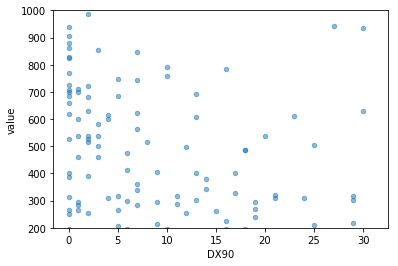

In [434]:

s1.plot(kind="scatter", x="DX90", y="value", alpha=0.5)
plt.ylim(200, 1000)

In [497]:
#s1.plot(kind="scatter", x="DP01", y="value", alpha=0.5)
#plt.xlim(0, 20)
#plt.ylim(100,5000)


In [473]:
 #s1['Month'] = DatetimeIndex(s1['DATE']).month
#s1['month']=s1.DATE[-2:]
s1['month']=s1['DATE'].str[-2:]
#print(s1['DATE'].astype(str).str[-1])
#print(s1.str.slice(start=5))

In [476]:
s1['month'] = s1['month'].astype(float)
s1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN,value,month
0,CEM00043466,Colombo,6.9,79.867,7.0,2010-01,NaN,NaN,5,2,...,0.59,NaN,NaN,NaN,0.80,NaN,NaN,NaN,584.0,1.0
1,CEM00043466,Colombo,6.9,79.867,7.0,2010-02,NaN,NaN,4,1,...,0.11,95.0,NaN,NaN,0.21,NaN,90.5,NaN,606.0,2.0
2,CEM00043466,Colombo,6.9,79.867,7.0,2010-03,NaN,NaN,7,4,...,0.70,94.0,NaN,NaN,1.20,NaN,90.4,NaN,294.0,3.0
3,CEM00043466,Colombo,6.9,79.867,7.0,2010-04,NaN,NaN,20,13,...,4.61,91.0,NaN,NaN,17.37,NaN,89.9,NaN,224.0,4.0
4,CEM00043466,Colombo,6.9,79.867,7.0,2010-05,NaN,NaN,23,16,...,5.31,92.0,NaN,NaN,31.00,NaN,88.6,NaN,296.0,5.0


In [479]:
corr_matrix= s1.corr()
corr_matrix['value'].sort_values(ascending=False)

value        1.000000
DP01         0.104320
DP10         0.066623
TMIN         0.065013
CDSD         0.036987
EMNT        -0.002603
PRCP        -0.008001
month       -0.014329
EMXP        -0.028354
TAVG        -0.036649
CLDD        -0.053089
DX70        -0.055889
ELEVATION   -0.117214
TMAX        -0.189298
EMXT        -0.262352
DX90        -0.275675
LONGITUDE   -0.328226
LATITUDE    -0.534717
DT00              NaN
DT32              NaN
DX32              NaN
HDSD              NaN
HTDD              NaN
Name: value, dtype: float64

(1000, 8000)

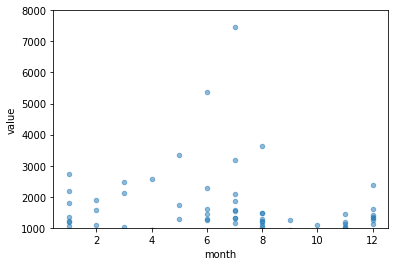

In [484]:
s1.plot(kind="scatter", x="month", y="value", alpha=0.5)
plt.ylim(1000,8000)